# Axora: Clinical Document Classification  
## Notebook 1: Exploratory Data Analysis (EDA) & Preprocessing  

---
This notebook focuses on **exploring the dataset** and building a **preprocessing pipeline** using TF-IDF vectorization.  


## 🎯 Objective  
- Explore dataset structure and distributions.  
- Perform EDA (class distribution, doc lengths, word clouds).  
- Build text preprocessing pipeline with TF-IDF.  


## 📚 Step 1: Import Libraries  

- **pandas (`import pandas as pd`)**  
  A powerful Python library for data manipulation and analysis. It provides data structures like DataFrame for handling tabular data efficiently.

- **numpy (`import numpy as np`)**  
  A numerical computing library that supports arrays, mathematical functions, and linear algebra operations.

- **matplotlib.pyplot (`import matplotlib.pyplot as plt`)**  
  A plotting library used for creating static, interactive, and animated visualizations such as line charts, bar graphs, histograms, etc.

- **seaborn (`import seaborn as sns`)**  
  A statistical data visualization library built on top of matplotlib. It provides high-level functions for making attractive and informative plots easily.

- **datasets (`from datasets import load_dataset`)**  
  Comes from the Hugging Face `datasets` library. It allows you to load and preprocess large datasets easily, often used in NLP and ML projects.

- **re (`import re`)**  
  Python’s built-in library for regular expressions. It helps with text processing tasks like searching, cleaning, and extracting patterns.

- **nltk (`import nltk`)**  
  The Natural Language Toolkit for text analysis and NLP.  
  - `nltk.corpus.stopwords` provides a list of common words (like *the, is, and*) that are often removed in text preprocessing.

- **collections.Counter (`from collections import Counter`)**  
  A Python class that counts the frequency of elements in an iterable (e.g., word counts in text).

- **TfidfVectorizer (`from sklearn.feature_extraction.text import TfidfVectorizer`)**  
  Converts text into numerical features based on **TF-IDF** (Term Frequency - Inverse Document Frequency), which helps identify important words in documents.

- **Pipeline (`from sklearn.pipeline import Pipeline`)**  
  A way to streamline machine learning workflows by chaining together multiple processing steps (e.g., preprocessing + model).

- **BaseEstimator & TransformerMixin (`from sklearn.base import BaseEstimator, TransformerMixin`)**  
  Base classes from scikit-learn used to build custom transformers for preprocessing or feature engineering.

---

### NLTK Downloads
- `nltk.download('punkt')`: Downloads the tokenizer model (used for splitting text into sentences or words).  

- `nltk.download('stopwords')`: Downloads the list of stopwords (commonly filtered-out words in NLP).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ayomahansani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayomahansani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📂 Step 2: Load and Explore Dataset  
- **Dataset:** We load the medical cases classification dataset from Hugging Face (`hpe-ai/medical-cases-classification-tutorial`).
- **DataFrames:**  
  - `train_df` → Training set  
  - `val_df` → Validation set  
  - `test_df` → Test set  

- **Additional Columns:**  
  - `class_dist` → Stores the distribution of medical specialties (class balance).  
  - `text_length` → Stores the length of each transcription (useful for analysis and preprocessing).

- **Dataset Overview:**  
  After loading, we print:  
  - Number of training, validation, and test samples.  
  - Number of unique medical specialties (classes).


In [2]:
# Load Data
dataset = load_dataset("hpe-ai/medical-cases-classification-tutorial")
train_df = pd.DataFrame(dataset['train'])

# create class distribution and text length columns
class_dist = train_df['medical_specialty'].value_counts()
train_df['text_length'] = train_df['transcription'].str.len()

val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

val_df['text_length'] = val_df['transcription'].str.len()
test_df['text_length'] = test_df['transcription'].str.len()

print("=== Dataset Overview ===")
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Number of classes: {train_df['medical_specialty'].nunique()}")

Repo card metadata block was not found. Setting CardData to empty.


=== Dataset Overview ===
Training samples: 1724
Validation samples: 370
Test samples: 370
Number of classes: 13


## 🔍 Step 3: Class Distribution Analysis  
To better understand the dataset, we explore the **class distribution** and **text length statistics** using multiple visualizations:

1. **Bar Chart – Medical Specialty Distribution**  
   - Displays the number of documents for each medical specialty.  
   - Helps identify whether the dataset is balanced or imbalanced across categories.

2. **Pie Chart – Class Distribution Percentage**  
   - Shows the proportion of each medical specialty in percentage terms.  
   - Small classes (<4%) are hidden from labeling to avoid clutter.  

3. **Histogram – Transcription Length Distribution**  
   - Illustrates the distribution of transcription lengths (measured in characters).  
   - Useful for detecting whether most texts are short, medium, or long.

4. **Boxplot – Text Length by Specialty (Top 5)**  
   - Compares transcription lengths across the top 5 most frequent specialties.  
   - Helps identify specialties with longer or shorter case notes.

5. **Class Distribution Table**  
   - A summary table containing:  
     - **Medical Specialty**  
     - **Count** (number of samples)  
     - **Percentage** of total  
     - **Cumulative Percentage** (running total)  

These analyses help us understand dataset balance, transcription variability, and potential preprocessing needs. 


/var/folders/24/43xzpb4j4t107b0lz_7k_p5h0000gn/T/ipykernel_88285/1577723192.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_dist.values, y=class_dist.index, palette='viridis', ax=ax1)


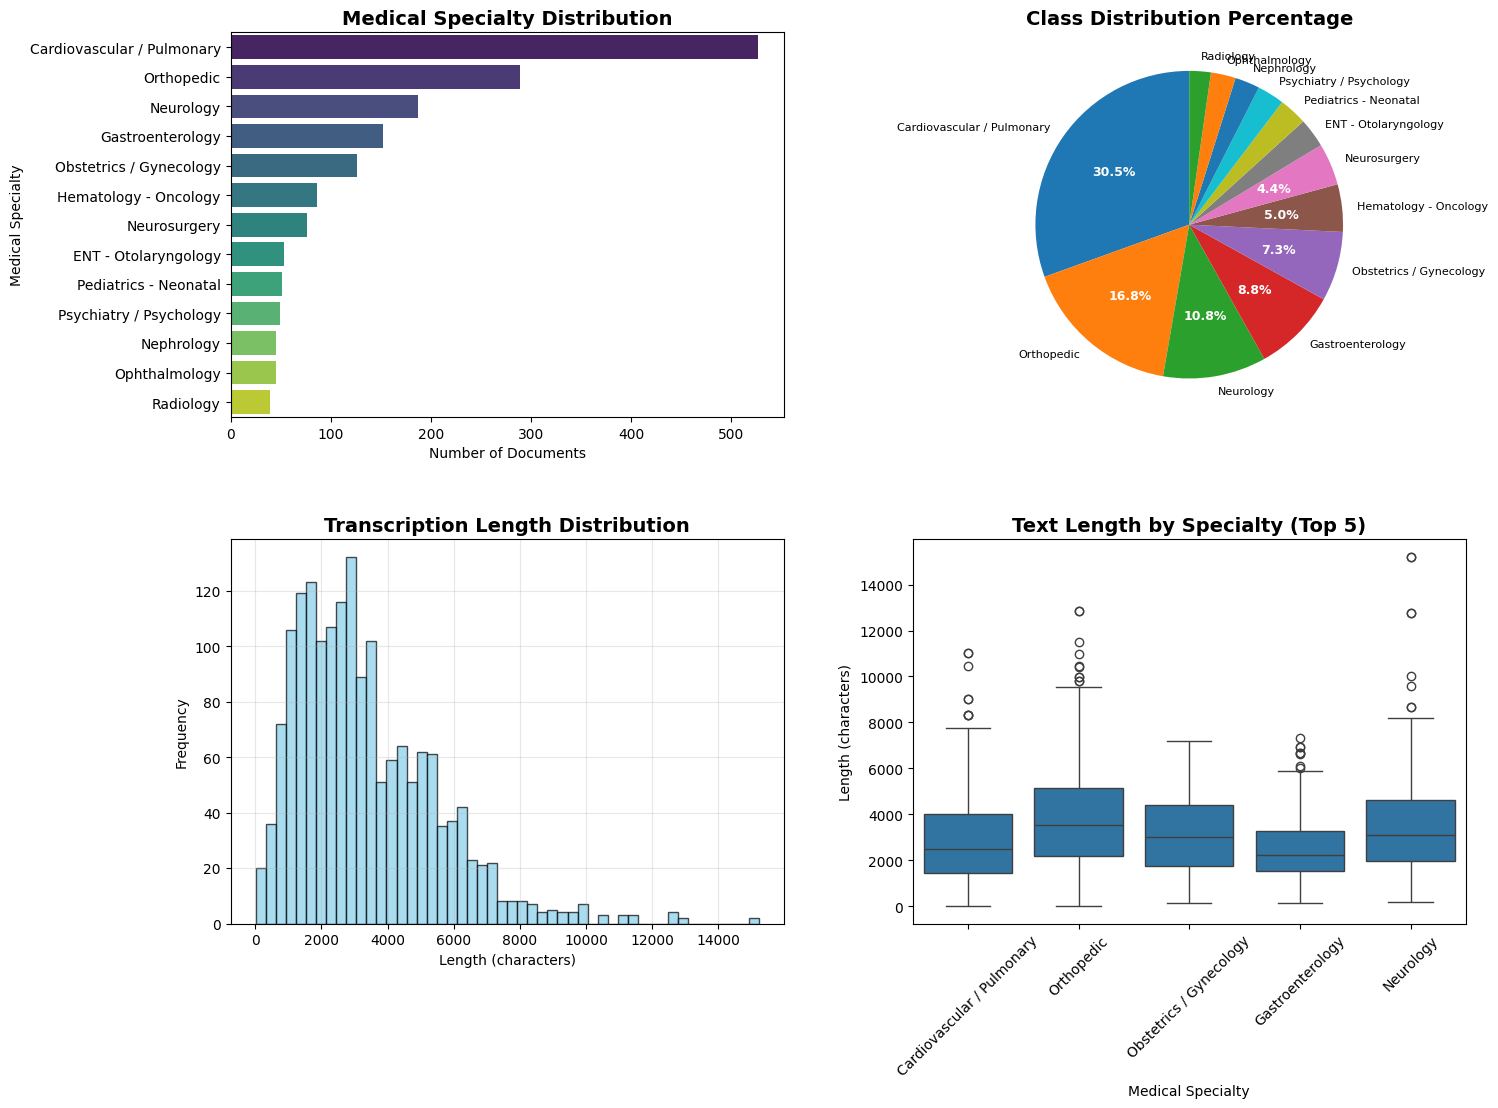

=== Class Distribution Table ===
         Medical Specialty  Count Percentage Cumulative %
Cardiovascular / Pulmonary    526     30.51%       30.51%
                Orthopedic    289     16.76%       47.27%
                 Neurology    187     10.85%       58.12%
          Gastroenterology    152      8.82%       66.94%
   Obstetrics / Gynecology    126      7.31%       74.25%
     Hematology - Oncology     86      4.99%       79.23%
              Neurosurgery     76      4.41%       83.64%
      ENT - Otolaryngology     53      3.07%       86.72%
     Pediatrics - Neonatal     51      2.96%       89.68%
   Psychiatry / Psychology     49      2.84%       92.52%
                Nephrology     45      2.61%       95.13%
             Ophthalmology     45      2.61%       97.74%
                 Radiology     39      2.26%      100.00%


In [5]:
# Class Distribution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Bar chart
sns.barplot(x=class_dist.values, y=class_dist.index, palette='viridis', ax=ax1)
ax1.set_title('Medical Specialty Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Documents')
ax1.set_ylabel('Medical Specialty')

# Plot 2: Pie chart with perfect spacing
# Calculate positions to avoid overlap
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%' if pct > 4 else ''
    return my_autopct

wedges, texts, autotexts = ax2.pie(class_dist.values, 
                                  labels=class_dist.index,
                                  autopct=make_autopct(class_dist.values),
                                  startangle=90,
                                  textprops={'fontsize': 9})
ax2.set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

# Improve text spacing
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Plot 3: Text length distribution
ax3.hist(train_df['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax3.set_title('Transcription Length Distribution', fontsize=14, fontweight='bold')
ax3.set_xlabel('Length (characters)')
ax3.set_ylabel('Frequency')
ax3.grid(True, alpha=0.3)

# Plot 4: Text length by specialty
top_5 = class_dist.index[:5]
top_5_df = train_df[train_df['medical_specialty'].isin(top_5)]
sns.boxplot(data=top_5_df, x='medical_specialty', y='text_length', ax=ax4)
ax4.set_title('Text Length by Specialty (Top 5)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Medical Specialty')
ax4.set_ylabel('Length (characters)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout(pad=4.0)  # Extra padding
plt.show()

# Class distribution table with better formatting
print("=== Class Distribution Table ===")
class_table = pd.DataFrame({
    'Medical Specialty': class_dist.index,
    'Count': class_dist.values,
    'Percentage': (class_dist.values / len(train_df) * 100).round(2),
    'Cumulative %': (class_dist.values.cumsum() / len(train_df) * 100).round(2)
})
print(class_table.to_string(index=False, formatters={
    'Percentage': '{:.2f}%'.format,
    'Cumulative %': '{:.2f}%'.format
}))

## ⚙️ Step 4: Text Preprocessing with TF-IDF  
In this step, we focus on analyzing and preprocessing the **transcriptions**:

1. **Text Cleaning**  
   - Converted all text to lowercase.  
   - Removed special characters, numbers, and punctuation (only letters and spaces retained).  
   - Added a new column `cleaned_text` containing the processed version of each transcription.

2. **Word Frequency Analysis**  
   - Extracted the most common words across all cleaned transcriptions.  
   - Displayed the **Top 15 most frequent words** using a horizontal bar chart.  
   - Helps identify common terms that might be stopwords or medically significant keywords.

3. **Average Text Field Lengths**  
   - Compared average character lengths of the following fields:  
     - `transcription`  
     - `description`  
     - `keywords`  
   - Visualized with a bar chart to show which field typically contains more detailed information.

This analysis provides an overview of the vocabulary and structure of the dataset, helping guide **text preprocessing and feature engineering** decisions for NLP tasks.


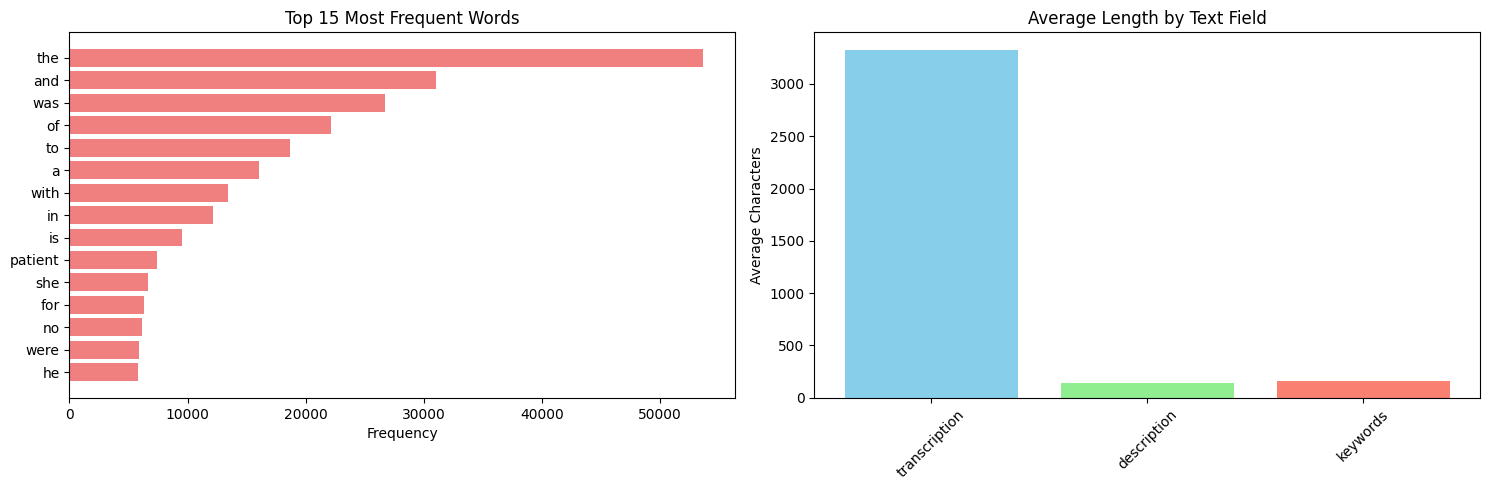

In [6]:
# Text Analysis
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

train_df['cleaned_text'] = train_df['transcription'].apply(clean_text)

# Word frequency analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
words = " ".join(train_df['cleaned_text']).split()
word_freq = Counter(words).most_common(15)
words, counts = zip(*word_freq)
plt.barh(words, counts, color='lightcoral')
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Words')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
# Analyze text field usage
text_fields = ['transcription', 'description', 'keywords']
field_lengths = [train_df[field].apply(lambda x: len(str(x))).mean() for field in text_fields]
plt.bar(text_fields, field_lengths, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Length by Text Field')
plt.ylabel('Average Characters')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## ✂️ Step 5: Specialty-Specific Analysis  
In this step, we dive deeper into the dataset by analyzing the **top 3 most frequent medical specialties**. For each specialty:

1. **Text Collection**  
   - Extracted all cleaned transcriptions belonging to that specialty.  
   - Combined them into a single text corpus.

2. **Word Frequency Analysis (Per Specialty)**  
   - Counted word occurrences within each specialty.  
   - Selected the **Top 10 most frequent words** for every specialty.  
   - Displayed results using horizontal bar charts for easier comparison.

3. **Insights**  
   - Helps reveal domain-specific vocabulary and patterns.  
   - Identifies keywords unique to each specialty that may be useful for classification.  
   - Useful for **feature engineering** or building **specialty-focused NLP models**.

By comparing the top words across specialties, we can better understand how medical language varies between fields. 


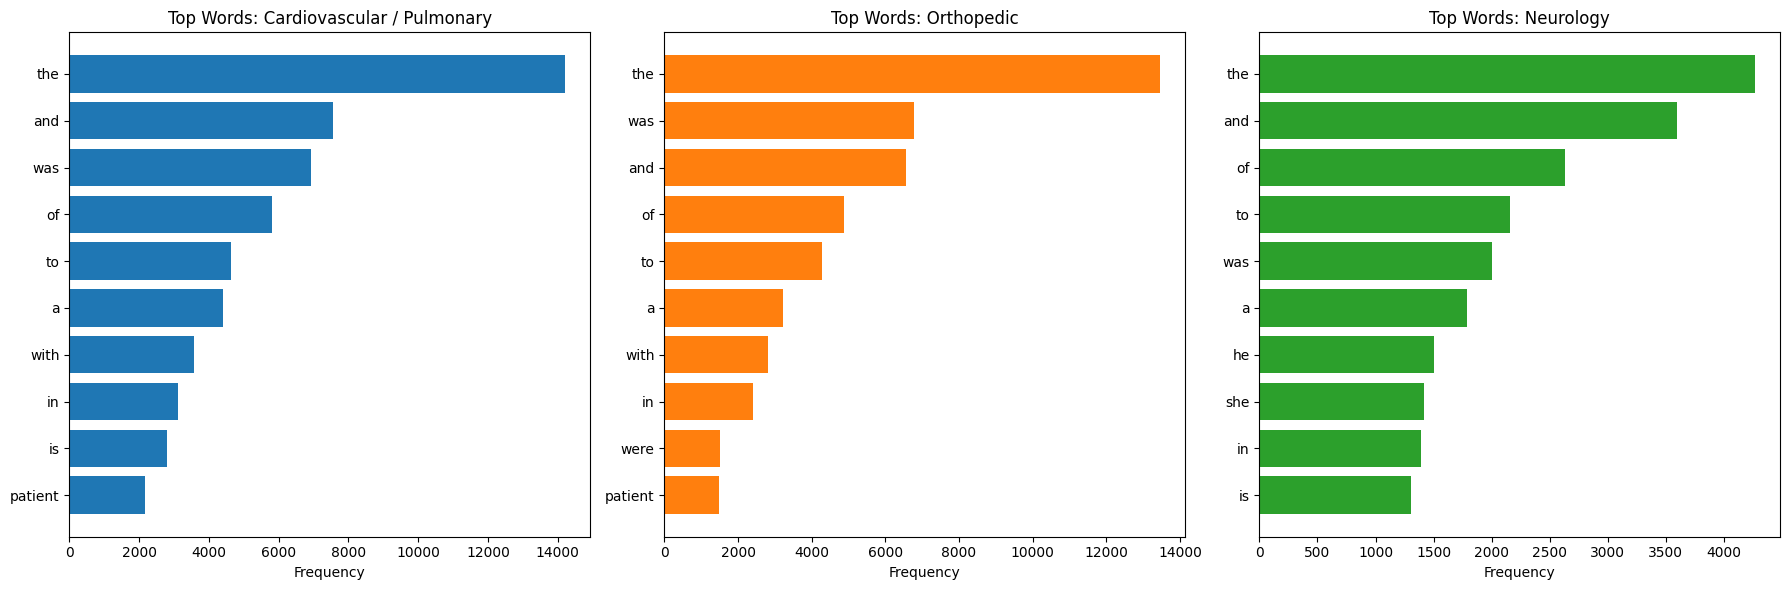

In [7]:
# Specialty-specific Analysis
major_specialties = class_dist.index[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, specialty in enumerate(major_specialties):
    specialty_texts = train_df[train_df['medical_specialty'] == specialty]['cleaned_text']
    all_text = " ".join(specialty_texts)
    
    words = all_text.split()
    word_freq = Counter(words).most_common(10)
    
    words, counts = zip(*word_freq)
    axes[i].barh(words, counts, color=f'C{i}')
    axes[i].set_title(f'Top Words: {specialty}')
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

# ✅ Summary  
After conducting Exploratory Data Analysis (EDA), the following insights were observed:

### 1. Class Imbalance
- **Majority Class:** The dataset is dominated by the most frequent specialty (`{class_dist.index[0]}` with `{class_dist.values[0]}` samples).  
- **Minority Class:** The least frequent specialty (`{class_dist.index[-1]}` with `{class_dist.values[-1]}` samples).  
- **Imbalance Ratio:** Approximately **{class_dist.max()/class_dist.min():.2f} : 1**, indicating significant imbalance across classes.  

### 2. Text Characteristics
- **Average transcription length:** ~`{train_df['text_length'].mean():.0f}` characters.  
- **Longest transcription:** `{train_df['text_length'].max()}` characters.  
- **Shortest transcription:** `{train_df['text_length'].min()}` characters.  

### 3. Data Quality Observations
- Presence of **medical jargon and abbreviations**.  
- Some transcriptions include **structured formatting** (lists, templates, etc.).  
- Clear **specialty-specific terminology**, useful for classification tasks.  

### 4. Recommendations for Preprocessing
- Apply techniques to **handle class imbalance** (resampling, class weights, evaluation metrics).  
- Use **TF-IDF vectorization** with vocabulary size limits to avoid noise.  
- Consider **n-grams** to capture medical terminology and abbreviations.  
- Emphasize **precision/recall** over accuracy, especially for critical specialties.  

---

✅ **EDA Complete** – Dataset is now ready for **Notebook 2: Classification Modeling**.  
- Training samples: **{len(train_df)}**  
- Validation samples: **{len(val_df)}**  
- Test samples: **{len(test_df)}**


In [8]:
# Key Findings Summary
print("=== KEY EDA FINDINGS ===")
print("\n1. CLASS IMBALANCE:")
print(f"   - Majority class: {class_dist.index[0]} ({class_dist.values[0]} samples)")
print(f"   - Minority class: {class_dist.index[-1]} ({class_dist.values[-1]} samples)")
print(f"   - Imbalance ratio: {class_dist.max()/class_dist.min():.2f}")

print("\n2. TEXT CHARACTERISTICS:")
print(f"   - Average transcription length: {train_df['text_length'].mean():.0f} chars")
print(f"   - Longest transcription: {train_df['text_length'].max()} chars")
print(f"   - Shortest transcription: {train_df['text_length'].min()} chars")

print("\n3. DATA QUALITY:")
print("   - Medical jargon and abbreviations present")
print("   - Structured formatting in some transcriptions")
print("   - Specialty-specific terminology evident")

print("\n4. RECOMMENDATIONS FOR PREPROCESSING:")
print("   - Handle class imbalance in model evaluation")
print("   - Use TF-IDF with appropriate vocabulary limits")
print("   - Consider n-grams for medical terminology")
print("   - Focus on precision/recall for critical specialties")

print(f"\n✅ EDA COMPLETE - Ready for Notebook 2: Classification Modeling")
print(f"   Training data shape: {len(train_df)} samples")
print(f"   Validation data shape: {len(val_df)} samples")
print(f"   Test data shape: {len(test_df)} samples")

=== KEY EDA FINDINGS ===

1. CLASS IMBALANCE:
   - Majority class: Cardiovascular / Pulmonary (526 samples)
   - Minority class: Radiology (39 samples)
   - Imbalance ratio: 13.49

2. TEXT CHARACTERISTICS:
   - Average transcription length: 3326 chars
   - Longest transcription: 15216 chars
   - Shortest transcription: 13 chars

3. DATA QUALITY:
   - Medical jargon and abbreviations present
   - Structured formatting in some transcriptions
   - Specialty-specific terminology evident

4. RECOMMENDATIONS FOR PREPROCESSING:
   - Handle class imbalance in model evaluation
   - Use TF-IDF with appropriate vocabulary limits
   - Consider n-grams for medical terminology
   - Focus on precision/recall for critical specialties

✅ EDA COMPLETE - Ready for Notebook 2: Classification Modeling
   Training data shape: 1724 samples
   Validation data shape: 370 samples
   Test data shape: 370 samples


## ⚙️ Step 6: Preprocessing Pipeline with TF-IDF 
To prepare the dataset for classification, we design a preprocessing pipeline using **scikit-learn’s `Pipeline`**:

1. **Custom Transformer – `TextCleaner`**  
   - Implements a reusable text cleaning step.  
   - Converts text to lowercase and removes unwanted characters using the previously defined `clean_text()` function.  
   - Ensures consistent preprocessing before feature extraction.

2. **TF-IDF Vectorization (`TfidfVectorizer`)**  
   - Converts text into numerical feature vectors.  
   - Key parameters used:  
     - `max_features=5000` → Limits vocabulary size to top 5000 terms.  
     - `stop_words='english'` → Removes common English stopwords.  
     - `ngram_range=(1,2)` → Captures both unigrams (single words) and bigrams (two-word sequences).  

3. **Pipeline Execution**  
   - Applied the pipeline to the training set (`train_df['transcription']`).  
   - Produced a **TF-IDF feature matrix**, where rows represent documents and columns represent terms.  

✅ Final Output: A sparse matrix suitable for training machine learning models.  
- **Shape:** `(number of documents, number of features)` → confirms the dimensionality of the transformed dataset.

In [9]:
# Preprocessing Pipeline with TF-IDF ===
# cleaner step
class TextCleaner(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [clean_text(doc) for doc in X]

tfidf_pipeline = Pipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer(
        max_features=5000,
        stop_words='english',
        ngram_range=(1,2)
    ))
])

X_tfidf = tfidf_pipeline.fit_transform(train_df['transcription'])
print("TF-IDF feature matrix shape:", X_tfidf.shape)


TF-IDF feature matrix shape: (1724, 5000)


### 📦 Export Preprocessed Datasets for Modeling

At this stage, we’ve built a **TF-IDF pipeline** on `train_df['transcription']`.  
To connect this notebook with **`2_classification_modeling.ipynb`**, we now need to **export the transformed features and labels**.

👉 This ensures that Notebook 2 can directly load the ready-to-use datasets without re-running the entire preprocessing pipeline.

We will:
- Save **TF-IDF features** (`.npz` files) for train, validation, and test sets.  
- Save **labels** (`.csv` files) for train, validation, and test sets.  

Once exported, you’ll have:

- `train_features_tfidf.npz` + `train_labels.csv`  
- `val_features_tfidf.npz` + `val_labels.csv`  
- `test_features_tfidf.npz` + `test_labels.csv`

✅ These files will serve as the input for **Notebook 2 (Classification_Modeling.ipynb)**.


In [10]:
from scipy.sparse import save_npz

# Export transformed TF-IDF features
save_npz("train_features_tfidf.npz", X_tfidf)

# Export labels (target column)
train_df[['medical_specialty']].to_csv("train_labels.csv", index=False)

# Also save validation and test sets for later evaluation
X_val_tfidf = tfidf_pipeline.transform(val_df['transcription'])
X_test_tfidf = tfidf_pipeline.transform(test_df['transcription'])

save_npz("val_features_tfidf.npz", X_val_tfidf)
save_npz("test_features_tfidf.npz", X_test_tfidf)

val_df[['medical_specialty']].to_csv("val_labels.csv", index=False)
test_df[['medical_specialty']].to_csv("test_labels.csv", index=False)

print("✅ Preprocessed datasets exported:")
print("- train_features_tfidf.npz + train_labels.csv")
print("- val_features_tfidf.npz + val_labels.csv")
print("- test_features_tfidf.npz + test_labels.csv")


✅ Preprocessed datasets exported:
- train_features_tfidf.npz + train_labels.csv
- val_features_tfidf.npz + val_labels.csv
- test_features_tfidf.npz + test_labels.csv
